# To find whether the person is vaccinated or not.
h1n1_vaccine is the dependent variable-classification

Dataset Downloaded From https://github.com/Premalatha-success/Datasets/blob/main/h1n1_vaccine_prediction.csv

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [5]:
os.chdir(r'C:\Users\amolc\Downloads\Datasets-main')

In [6]:
os.listdir()

['airline-passenger-traffic.csv',
 'auto-mpg.csv',
 'CardioGoodFitness-1.csv',
 'Churn_Modelling.csv',
 'concrete.csv',
 'Eye.csv',
 'Global Superstore.xlsx',
 'h1n1_vaccine_prediction.csv',
 'hotel_bookings.csv',
 'HousePrices.csv',
 'housing.csv',
 'input_data.xlsx',
 'insurance (2).csv',
 'iris.data',
 'loan_prediction.csv',
 'pima-indians-diabetes-2.csv',
 'Solar.csv',
 'TaxiFare.csv',
 'technical_support_data-2.csv',
 'temp.csv',
 'titanic-training-data.csv',
 'winequalityN.csv',
 'wisc_bc_data.csv',
 'World Happiness Report.csv',
 'xAPI-Edu-Data.csv',
 'yearly-water-usage.csv']

In [7]:
vaccine = pd.read_csv('h1n1_vaccine_prediction.csv')

In [8]:
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:
vaccine.shape

(26707, 34)

In [11]:
vaccine.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [12]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [13]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)

In [14]:
vaccine.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [15]:
vaccine['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

<Axes: >

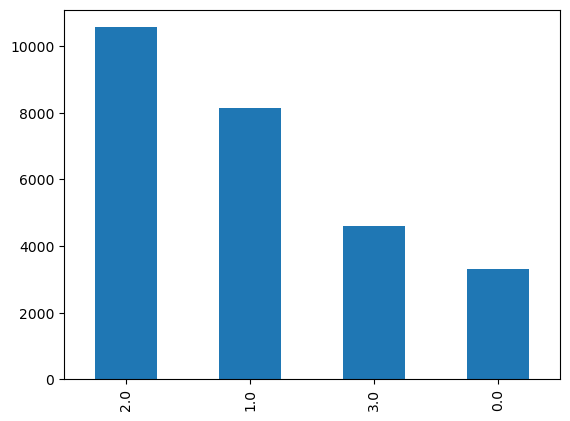

In [16]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')

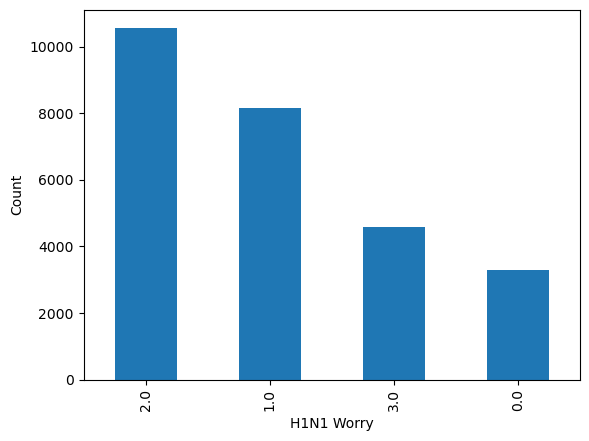

In [17]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [18]:
display(vaccine['h1n1_worry'].mode(), vaccine['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

In [19]:
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0], inplace=True)

In [20]:
vaccine['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

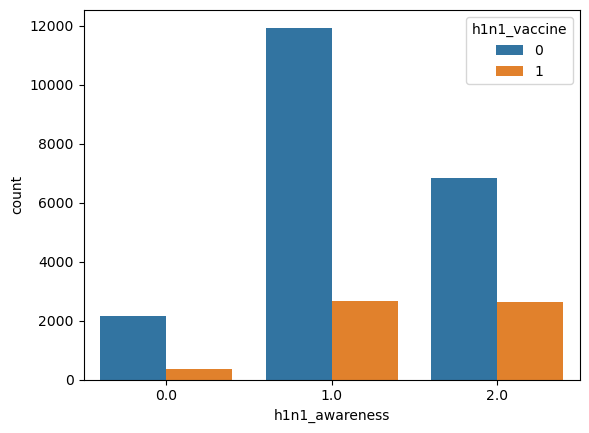

In [21]:
sns.countplot(x='h1n1_awareness', data=vaccine, hue = 'h1n1_vaccine')
plt.show()

In [22]:
vaccine['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [23]:
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)

In [24]:
vaccine['antiviral_medication'].unique()

array([ 0.,  1., nan])

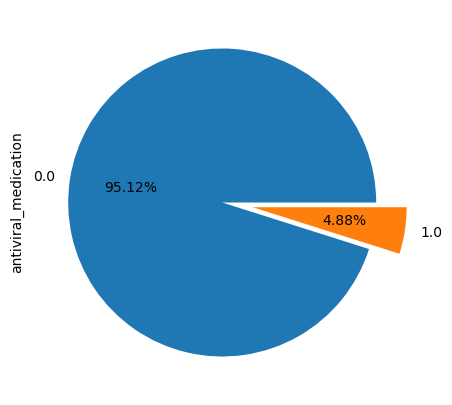

In [25]:
vaccine['antiviral_medication'].value_counts().plot(kind='pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [26]:
display(vaccine['antiviral_medication'].mode())
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)

0    0.0
Name: antiviral_medication, dtype: float64

In [27]:
vaccine['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [28]:
vaccine['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

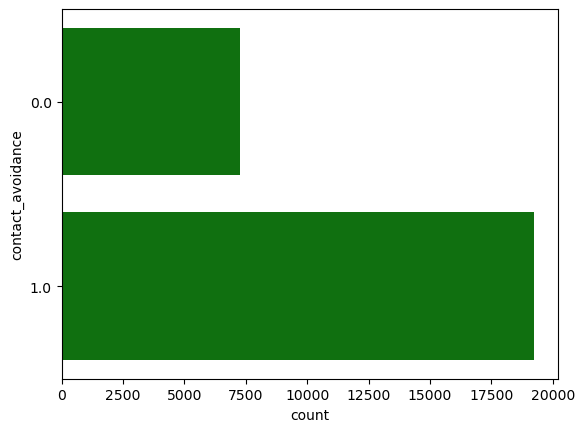

In [29]:
sns.countplot(y='contact_avoidance', data=vaccine, color='green')
plt.show()

In [30]:
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)

In [31]:
vaccine['bought_face_mask'].unique()

array([ 0.,  1., nan])

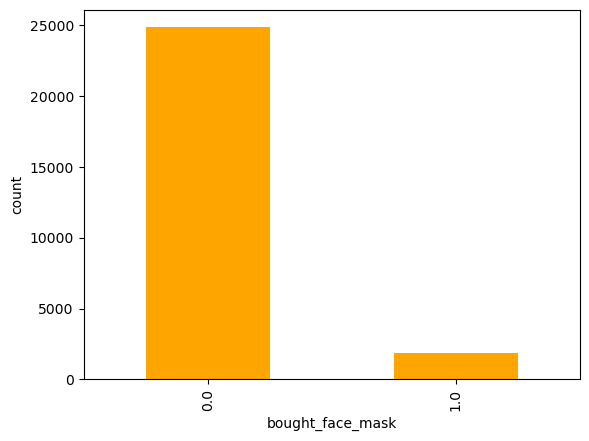

In [32]:
vaccine['bought_face_mask'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [33]:
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)

In [34]:
vaccine['wash_hands_frequently'].unique()

array([ 0.,  1., nan])

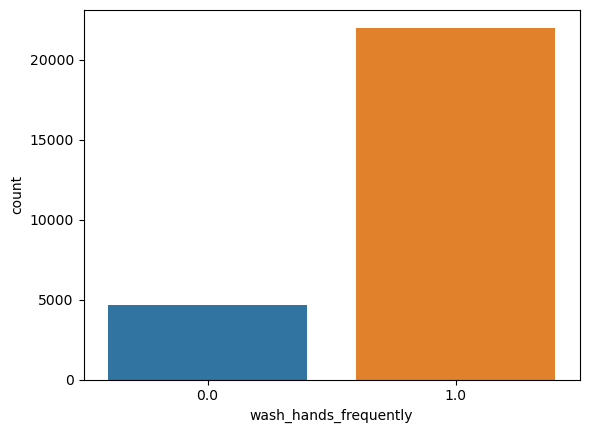

In [35]:
sns.countplot(x='wash_hands_frequently', data=vaccine)
plt.show()

In [36]:
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)

In [37]:
vaccine['avoid_large_gatherings'].unique()

array([ 0.,  1., nan])

In [38]:
vaccine['avoid_large_gatherings'].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [39]:
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)

In [40]:
vaccine['reduced_outside_home_cont'].unique()

array([ 1.,  0., nan])

In [41]:
vaccine['reduced_outside_home_cont'].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [42]:
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)

In [43]:
vaccine['avoid_touch_face'].unique()

array([ 1.,  0., nan])

In [44]:
vaccine['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [45]:
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)

In [46]:
display(vaccine['dr_recc_h1n1_vacc'].unique(), vaccine['dr_recc_seasonal_vacc'].unique())

array([ 0., nan,  1.])

array([ 0., nan,  1.])

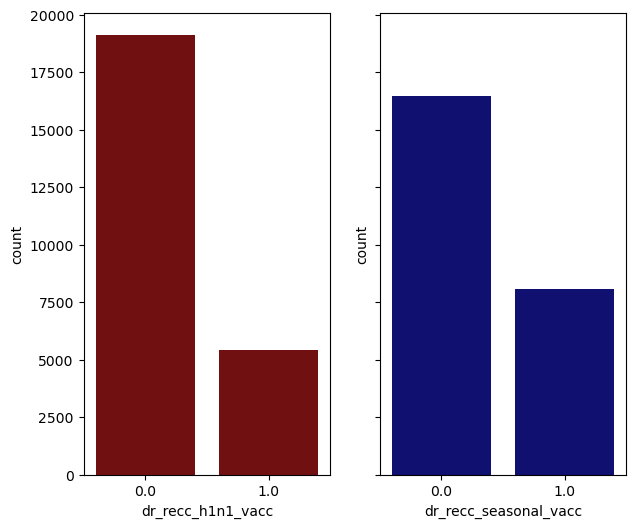

In [47]:
fig, ax=plt.subplots(1,2, figsize = [7,6], sharey = True)
sns.countplot(x='dr_recc_h1n1_vacc', data=vaccine, color='maroon', ax=ax[0])
sns.countplot(x='dr_recc_seasonal_vacc',data=vaccine, color='navy', ax=ax[1])
plt.show()

In [48]:
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [49]:
vaccine['chronic_medic_condition'].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [50]:
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)

<Axes: >

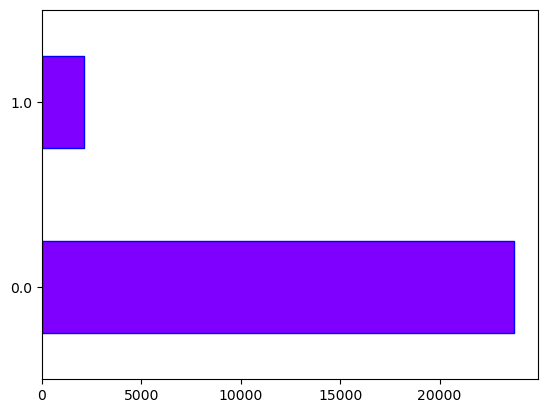

In [51]:
vaccine['cont_child_undr_6_mnths'].value_counts().plot(kind='barh',cmap = 'rainbow', edgecolor='b')

In [53]:
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [54]:
vaccine['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [55]:
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)

In [56]:
vaccine['has_health_insur'].unique()

array([ 1., nan,  0.])

<Axes: >

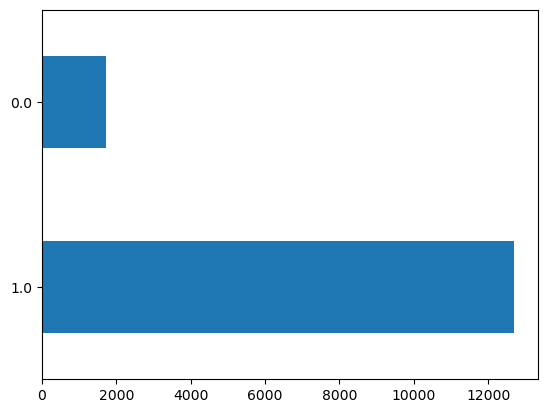

In [57]:
vaccine['has_health_insur'].value_counts().plot(kind='barh')

In [58]:
vaccine['has_health_insur'].fillna(2.0, inplace = True)

<Axes: >

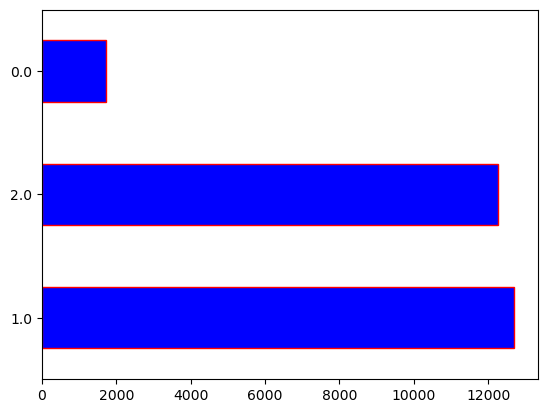

In [59]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh', color = 'b', edgecolor = 'r' )

In [60]:
display(vaccine['is_h1n1_vacc_effective'].unique(), vaccine['is_seas_vacc_effective'].unique())

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

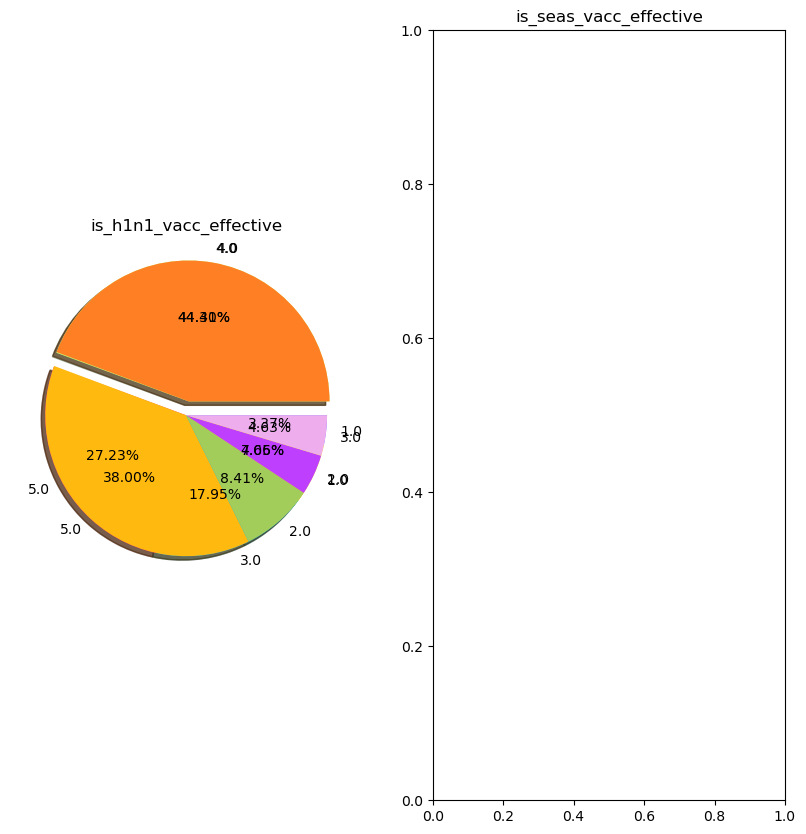

In [61]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3FFF', '#EEAEEE']
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(vaccine['is_h1n1_vacc_effective'].value_counts(), labels = vaccine['is_h1n1_vacc_effective'].value_counts().index, autopct = '%0.2f%%', explode = [0.1,0,0,0,0], colors = colors, shadow = True)
ax1.pie(vaccine['is_seas_vacc_effective'].value_counts(), labels = vaccine['is_seas_vacc_effective'].value_counts().index, autopct = '%0.2f%%', explode = [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()